# This notebook tests how to load data stored in BigQuery on Datalab notebook

## Load "publicdata.samples.natality" data on this notebook

#### SQL クエリの投げ方：
1. %% bq query　マジックコードで、これ以降クエリを投げる宣言
2. SELECT文で、先にしたい操作を書く
3. FROM文で、どこのデータを引っ張ってくるか指定
4. 以降、グループ分け・順序・表示行数等を指定


In [1]:
%%bq query
#SQL query to return total births by year
SELECT CAST(source_year AS string) AS year, COUNT(is_male) AS birth_count # CAST: cast intenger to string
FROM `publicdata.samples.natality`
GROUP BY year
ORDER BY year DESC # 降順 descending order
LIMIT 15 # show 15 rows

year,birth_count
2008,4255156
2007,4324008
2006,4273225
2005,4145619
2004,4118907
2003,4096092
2002,4027376
2001,4031531
2000,4063823
1999,3963465


## Add "--name" flag

The query objct is passed to **"total_births"**, and the name is used to show a bar graph

In [3]:
%%bq query --name total_births 
# SQL query to return total births by year
SELECT CAST(source_year AS string) AS year, COUNT(is_male) AS birth_count
FROM `publicdata.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

### Show a bar graph

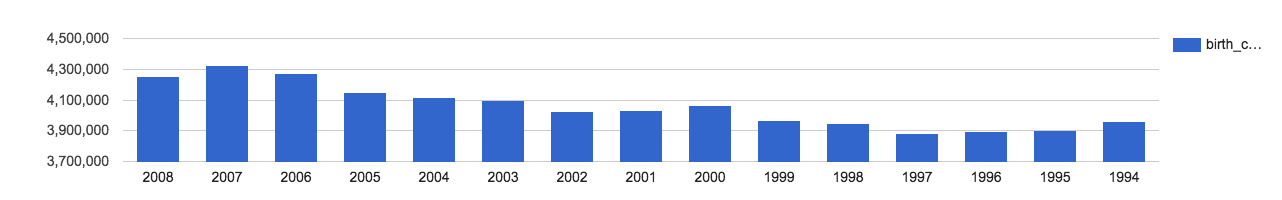

In [5]:
%chart columns --data total_births --fields year,birth_count # Don't make a space between "year" and "birth_count" 

The bar graph shows **"year" vs. "birth_count"** contained in the **"total_births"** object

## Get "birth_count" grouped by weekday

In [6]:
%%bq query --name births_by_weekday
SELECT CAST(wday AS string) AS weekday, SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births, SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births
FROM `publicdata.samples.natality`
WHERE wday IS NOT NULL
GROUP BY weekday
ORDER BY weekday ASC # 昇順 Ascending order

### Show a chart line graph 

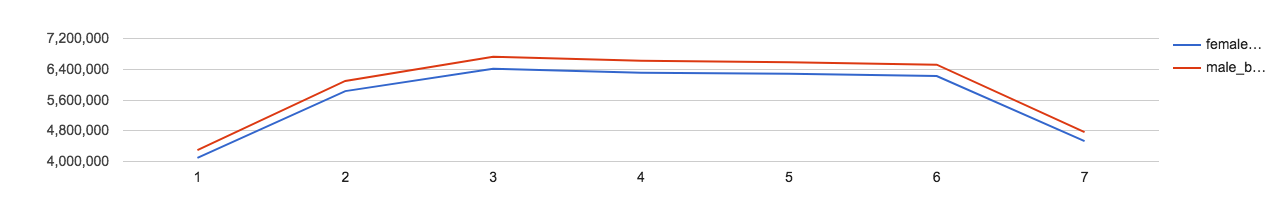

In [7]:
%chart line --data births_by_weekday --fields weekday,female_births,male_births

# Visualize BigQuery data by Pandas DataFrame

## Run a query using BigQuery API 

In [9]:
import google.datalab.bigquery as bq
import pandas as pd

In [11]:
total_births = bq.Query('SELECT CAST(source_year AS string) AS year, COUNT(is_male) AS birth_count FROM `publicdata.samples.natality` GROUP BY year ORDER BY year DESC LIMIT 15')
df = total_births.execute(output_options=bq.QueryOutput.dataframe()).result() # convert total_births to DataFrame and return result
df.head(10) # show 10 rows

,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907
5,2003,4096092
6,2002,4027376
7,2001,4031531
8,2000,4063823
9,1999,3963465


## Show a bar graph using "df.plot"

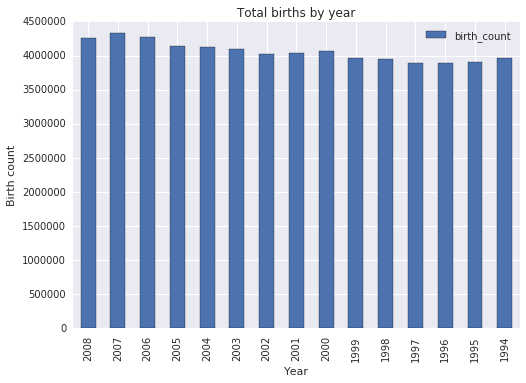

In [12]:
ax = df.plot(kind='bar', x='year', title='Total births by year')
ax.set_xlabel('Year')
ax.set_ylabel('Birth count')

# Get birth_count data grouped by weekday 

## Run a query using BigQuery API 

In [13]:
births_by_weekday = bq.Query('SELECT CAST(wday AS string) AS weekday, SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births, SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births FROM `publicdata.samples.natality` WHERE wday IS NOT NULL GROUP BY weekday ORDER BY weekday ASC')
df2 = births_by_weekday.execute(output_options=bq.QueryOutput.dataframe()).result()

## Show a chart line graph using "df.plot"

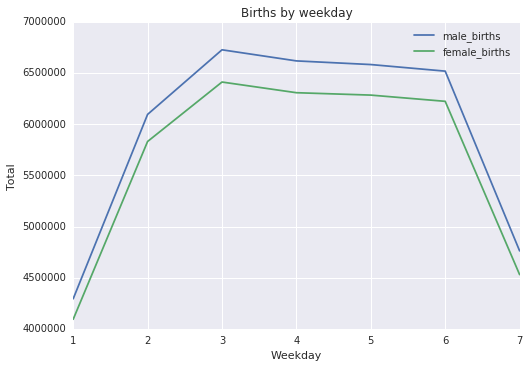

In [14]:
ax = df2.plot(kind='line', x='weekday', title='Births by weekday')
ax.set_xlabel('Weekday')
ax.set_ylabel('Total')